In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import math

In [ ]:
df=pd.read_csv("/content/googleplaystore1.csv")

In [ ]:
df.head(1)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_unit,Size_clean
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,M,19.0


In [ ]:
df.shape

(10840, 16)

In [ ]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_unit', 'Size_clean'],
      dtype='object')

In [ ]:
df["App"].duplicated()

,App
0,False
1,False
2,False
3,False
4,False
...,...
10835,False
10836,False
10837,False
10838,False


In [ ]:
df["App"].duplicated().sum()

np.int64(1181)

In [ ]:
df=df.drop_duplicates(subset="App",keep="first")

In [ ]:
df.shape

(9659, 16)

In [ ]:
# num : numerical ; cat : categorical
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [ ]:
num_features

['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Price', 'Size_clean']

In [ ]:
cat_features

['App',
 'Category',
 'Installs',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'Size_unit']

In [ ]:
print("{} numerical features : {} ".format(len(num_features),num_features))
print("{} categorical features : {} ".format(len(cat_features),cat_features))

6 numerical features : ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Price', 'Size_clean'] 
10 categorical features : ['App', 'Category', 'Installs', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Size_unit'] 


In [ ]:
for col in cat_features:
  print(f"the feature : {col}")
  print(df[col].unique())
  print("--------xx-------")

the feature : App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------xx-------
the feature : Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
--------xx-------
the feature : Installs
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '

In [ ]:
for col in cat_features:
  print(f"the feature : {col}")
  print(df[col].value_counts())
  print("--------xx-------")

the feature : App
App
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
                                                     ..
Learn To Draw Kawaii Characters                       1
3D Color Pixel by Number - Sandbox Art Coloring       1
Mandala Coloring Book                                 1
Tattoo Name On My Photo Editor                        1
Name Art Photo Editor - Focus n Filters               1
Name: count, Length: 9659, dtype: int64
--------xx-------
the feature : Category
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS              

In [ ]:
for col in cat_features:
  print(f"the feature : {col}")
  print(df[col].value_counts(normalize=True)*100)
  print("--------xx----")

the feature : App
App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
--------xx----
the feature : Category
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.

In [ ]:
for col in num_features:
  print(f"the feature : {col}\n")
  print(df[col].value_counts(normalize=True)*100)
  print("--------xx----")

the feature : Unnamed: 0

Unnamed: 0
10840    0.010353
0        0.010353
1        0.010353
2        0.010353
3        0.010353
           ...   
15       0.010353
14       0.010353
13       0.010353
12       0.010353
11       0.010353
Name: proportion, Length: 9659, dtype: float64
--------xx----
the feature : Rating

Rating
4.3    10.944363
4.4    10.919961
4.5    10.346510
4.2     9.882870
4.6     8.333333
4.1     7.576867
4.0     6.259151
4.7     5.392875
3.9     4.380185
3.8     3.489507
5.0     3.306491
3.7     2.733041
4.8     2.696437
3.6     2.037579
3.5     1.903367
3.4     1.537335
3.3     1.220107
4.9     1.037091
3.0     0.988287
3.1     0.841874
3.2     0.768668
2.9     0.549048
2.8     0.488043
2.6     0.292826
2.7     0.280625
2.3     0.244021
2.5     0.244021
2.4     0.231820
1.0     0.195217
2.2     0.170815
2.0     0.146413
1.9     0.134212
1.7     0.097609
1.8     0.097609
2.1     0.097609
1.6     0.048804
1.4     0.036603
1.5     0.036603
1.2     0.012201
Name: propo

In [ ]:
df.to_csv("googleplaystore2.csv")

In [ ]:
files.download("googleplaystore2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-206-275245644.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_features[i]],shade=True,color="b")
/tmp/ipython-input-206-275245644.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_features[i]],shade=True,color="b")
/tmp/ipython-input-206-275245644.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_features[i]],shade=True,color="b")
/tmp/ipython-input-206-275245644.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_features[i]],shade=

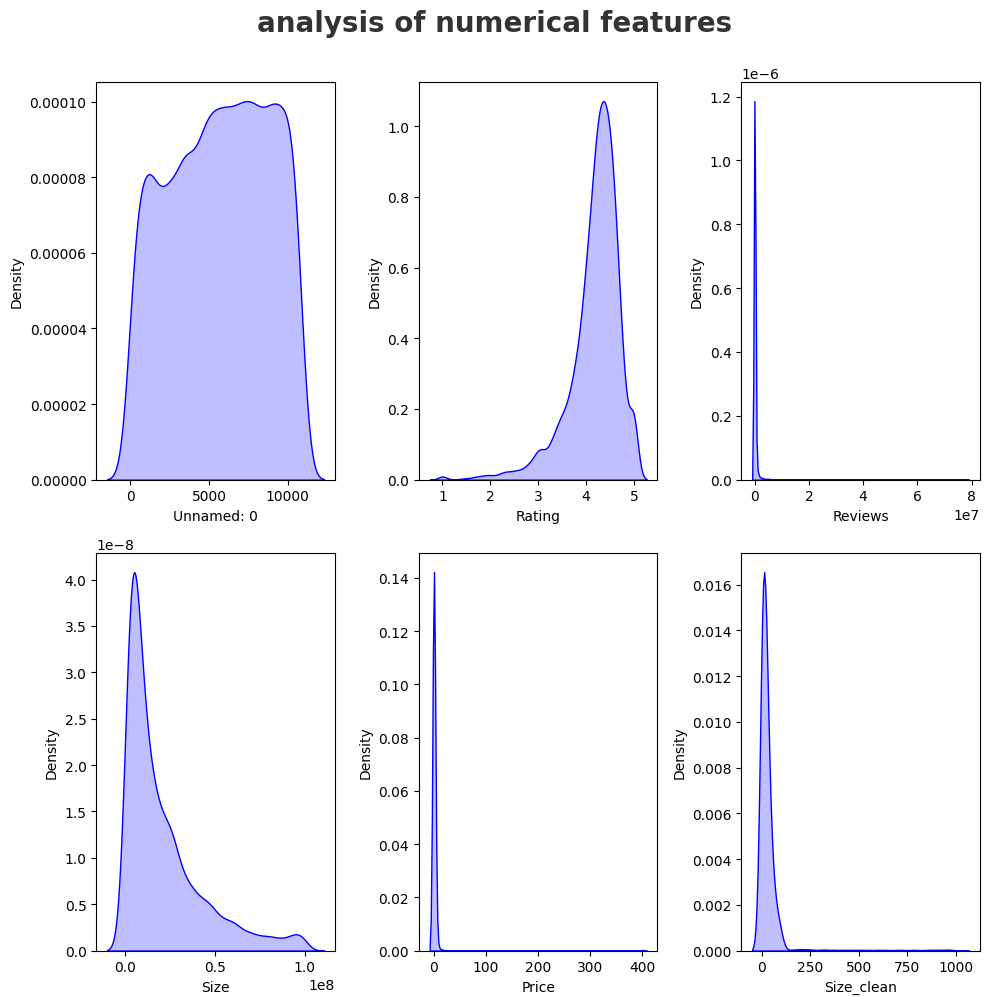

In [ ]:
cols=3
rows=math.ceil(len(num_features)/cols)


plt.figure(figsize=(10,10))
plt.suptitle("analysis of numerical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)

for i in range(0,len(num_features)):
  plt.subplot(rows,cols,i+1)
  sns.kdeplot(x=df[num_features[i]],shade=True,color="b")
  plt.xlabel(num_features[i],font="dark")
  plt.tight_layout()

plt.show()


Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-207-4257161849.py:13: UserWarning: Glyph 47716 (\N{HANGUL

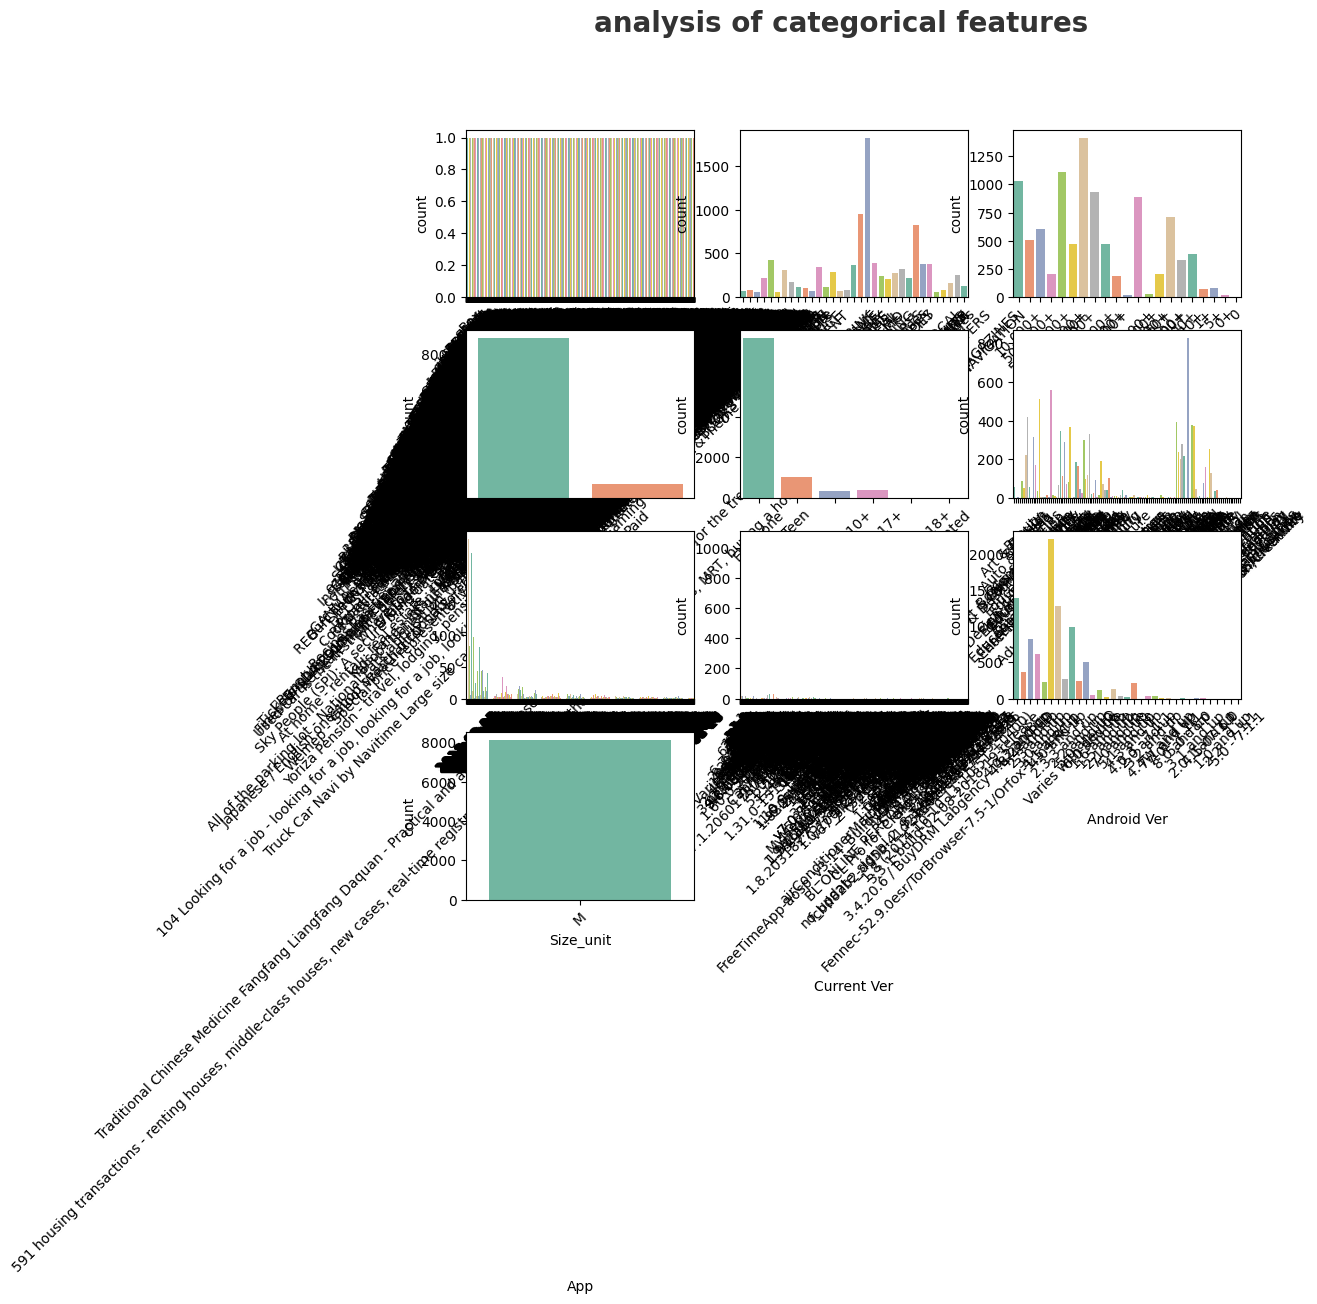

In [ ]:
cols=3
rows=math.ceil(len(cat_features)/cols)


plt.figure(figsize=(10,10))
plt.suptitle("analysis of categorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)

for i in range(0,len(cat_features)):
  plt.subplot(rows,cols,i+1)
  sns.countplot(x=df[cat_features[i]],palette="Set2")
  plt.xlabel(cat_features[i])
  plt.xticks(rotation=45)
  plt.tight_layout()

plt.show()
